<a href="https://colab.research.google.com/github/kradkahaddi/Aptos-Blindness-Detection-Kaggle/blob/master/Aptos_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importing google file interface
from google.colab import files

#creating a variable to store kaggle authenticator .json file
uploaded = files.upload()

#shifting the kaggle variable to the appropriate folder
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json 

Saving kaggle.json to kaggle.json


In [0]:
!kaggle competitions download -c aptos2019-blindness-detection

100% 8.01G/8.01G [01:27<00:00, 140MB/s]
100% 8.01G/8.01G [01:27<00:00, 98.0MB/s]
100% 1.50G/1.50G [00:15<00:00, 106MB/s]
100% 1.50G/1.50G [00:15<00:00, 103MB/s]
  0% 0.00/53.7k [00:00<?, ?B/s]
100% 53.7k/53.7k [00:00<00:00, 81.3MB/s]
  0% 0.00/24.5k [00:00<?, ?B/s]
100% 24.5k/24.5k [00:00<00:00, 21.5MB/s]
  0% 0.00/28.3k [00:00<?, ?B/s]
100% 28.3k/28.3k [00:00<00:00, 29.7MB/s]


In [0]:
!ls

sample_data	       test.csv		train.csv
sample_submission.csv  test_images.zip	train_images.zip


In [0]:
!mkdir test
!mkdir train

!unzip -q test_images.zip -d test
!unzip -q train_images.zip -d train

In [0]:
  !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from pathlib import Path
import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
# os.listdir('/kaggle/input')
# Any results you write to the current directory are saved as output.

from fastai.vision import *
from fastai.metrics import error_rate
bs = 32

path = Path(".")

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline


In [0]:
path_train = path/'train'
path_test = path/'test'
train_df = pd.read_csv(path/'train.csv') 
test_df = pd.read_csv(path/'test.csv')

train_df_sample = train_df.iloc[::5]

In [0]:
2%2

In [0]:
train_df_sample.diagnosis.value_counts()

0    341
2    211
1     81
4     64
3     36
Name: diagnosis, dtype: int64

In [0]:
train_df.diagnosis.value_counts()

In [0]:
dropped = train_df.drop(train_df.iloc[::3].index)

In [0]:
dropped.shape

(2441, 2)

In [0]:
df_0 = train_df.loc[train_df.diagnosis == 0].iloc[::9]
df_1 = train_df.loc[train_df.diagnosis == 1].iloc[::2]
df_2 = train_df.loc[train_df.diagnosis == 2].iloc[::5]
df_3 = train_df.loc[train_df.diagnosis == 3]
df_4 = train_df.loc[train_df.diagnosis == 4].iloc[::2]

sample_frames = [df_0, df_1, df_2, df_3, df_4]
train_df_sample = pd.concat(sample_frames)
train_df_sample.diagnosis.value_counts()

In [0]:
data = ImageDataBunch.from_df(path_train, train_df_sample, size = 128, suffix='.png').normalize(imagenet_stats)

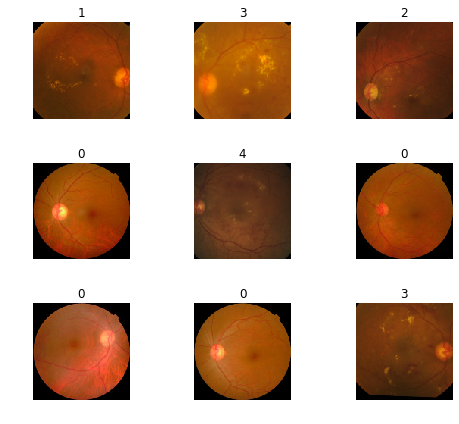

In [0]:
data.show_batch(rows=3, figsize=(7,6))

In [0]:
data_2 = ImageDataBunch.from_df(path_train, train_df, size = 128, suffix='.png').normalize(imagenet_stats)

In [0]:
learn_2 = cnn_learner(data_2, models.resnet34, metrics = error_rate)

In [0]:
learn_2.fit_one_cycle(5, max_lr=3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.159650,0.697460,0.255464,08:29
1,0.829812,0.648686,0.259563,08:26
2,0.620393,0.589149,0.219945,08:27
3,0.459859,0.595057,0.209016,08:26
4,0.364349,0.581715,0.206284,08:26


In [0]:
learn_2.unfreeze()
learn_2.fit_one_cycle(4, max_lr=slice(3e-6,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.289812,0.604466,0.204918,08:30
1,0.249470,0.636740,0.193989,08:35
2,0.166353,0.649736,0.191257,08:34
3,0.117034,0.653827,0.189891,08:37


In [0]:
learn_2.save('model_1', return_path=True)

PosixPath('train/models/model_1.pth')

In [0]:
files.download('train/models/model_1.pth')

MessageError: ignored

In [0]:
!find -name 'train.csv'

./train.csv


In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
learn.model

In [0]:
learn.fit_one_cycle(4) #at size 128 is better

epoch,train_loss,valid_loss,error_rate,time
0,1.571093,0.938749,0.363014,01:47
1,1.168607,0.855624,0.294521,01:47
2,0.923483,0.805617,0.273973,01:47
3,0.761313,0.793783,0.260274,01:45


In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


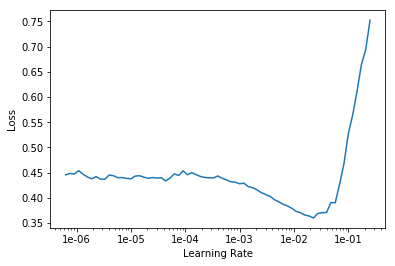

In [0]:
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(3e-4,3e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.663087,1.099313,0.315068,01:47
1,0.723606,2.541575,0.356164,01:45
2,0.643795,1.320379,0.301370,01:47
3,0.520097,0.874177,0.280822,01:49


In [0]:
data_2 = ImageDataBunch.from_df(path_train, train_df, size = 128, suffix='.png').normalize(imagenet_stats)

In [0]:
learn.fit_one_cycle(4, max_lr=1e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.228009,1.042782,0.328767,01:46
1,0.155238,1.507978,0.342466,01:47
2,0.167642,1.172633,0.321918,01:48
3,0.145633,1.159770,0.273973,01:47


In [0]:
torch.cuda.current_device()


In [0]:
import torch
torch.cuda.current_device()

In [0]:
import torch
torch.cuda.get_device_name(0)

In [0]:
learn.purge()

In [0]:
learn_unet.fit_one_cycle(1)

In [0]:
learn_unet = unet_learner(data, arch = models.resnet34, metrics = error_rate)

In [0]:
learn.fit_one_cycle(4) # at size 64

epoch,train_loss,valid_loss,error_rate,time
0,1.946356,1.589392,0.589041,00:48
1,1.629035,1.191050,0.438356,00:48
2,1.325886,1.048512,0.397260,00:47
3,1.145527,0.992066,0.356164,00:49
